# Vegetable Price Prediction Using Machine Learning
Implemented for West Bengal, Kolkata district, Bara Bazar market (Commodity = Onion) 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [8]:
vegetables = pd.read_csv('Nagpur_Oranges.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Nagpur,Bhiwapur,Orange,Other,FAQ,4000,9000,6200,11-Dec-19
1,2,Nagpur,Bhiwapur,Orange,Other,FAQ,4000,8050,6425,02-Dec-19
2,3,Nagpur,Bhiwapur,Orange,Other,FAQ,3000,7000,5000,22-Nov-19
3,4,Nagpur,Bhiwapur,Orange,Other,FAQ,3000,6000,4500,15-Nov-19
4,5,Nagpur,Bhiwapur,Orange,Other,FAQ,3000,60006,4500,08-Nov-19


# Data Selection

select District Name == Kolkata <br>
Select Market Name == Bara Bazar (Posta Bazar) <br>
Then Select Variety == Jyoti

In [9]:
vegetables = vegetables[vegetables['District Name'] == "Nagpur"]
vegetables = vegetables[vegetables['Market Name'] == "Nagpur"]
vegetables = vegetables[vegetables['Commodity'] == "Orange"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
15,16,Nagpur,Nagpur,Orange,Other,FAQ,900,3100,2550,30-Dec-19
16,17,Nagpur,Nagpur,Orange,Other,FAQ,800,3100,2525,28-Dec-19
17,18,Nagpur,Nagpur,Orange,Other,FAQ,800,3100,2525,26-Dec-19
18,19,Nagpur,Nagpur,Orange,Other,FAQ,900,3200,2625,24-Dec-19
19,20,Nagpur,Nagpur,Orange,Other,FAQ,900,3000,2475,23-Dec-19


In [10]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
24,25,Nagpur,Nagpur,Orange,Other,FAQ,800,3000,2450,16
23,24,Nagpur,Nagpur,Orange,Other,FAQ,800,3400,2750,17
22,23,Nagpur,Nagpur,Orange,Other,FAQ,800,2900,2375,18
21,22,Nagpur,Nagpur,Orange,Other,FAQ,800,2800,2225,19
20,21,Nagpur,Nagpur,Orange,Other,FAQ,800,3000,2450,20
19,20,Nagpur,Nagpur,Orange,Other,FAQ,900,3000,2475,23
18,19,Nagpur,Nagpur,Orange,Other,FAQ,900,3200,2625,24
17,18,Nagpur,Nagpur,Orange,Other,FAQ,800,3100,2525,26
16,17,Nagpur,Nagpur,Orange,Other,FAQ,800,3100,2525,28
15,16,Nagpur,Nagpur,Orange,Other,FAQ,900,3100,2550,30


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [11]:
climate = pd.read_csv('climate_Banglore_540.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name Market Name Commodity Variety Grade  \
0    155     156        Nagpur      Nagpur    Orange   Other   FAQ   
1    154     155        Nagpur      Nagpur    Orange   Other   FAQ   
2    153     154        Nagpur      Nagpur    Orange   Other   FAQ   
3    152     153        Nagpur      Nagpur    Orange   Other   FAQ   
4    151     152        Nagpur      Nagpur    Orange   Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      700                     2400   
1                      700                     2400   
2                      700                     2300   
3                      700                     2300   
4                      700                     2100   

   Modal Price (Rs./Quintal)  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  \
0                       1975  ...  41.339630  36.488889  52.259259  38.308148   
1                       1975  ...  41.420185  36.557407  52.392593  38.392037   
2    

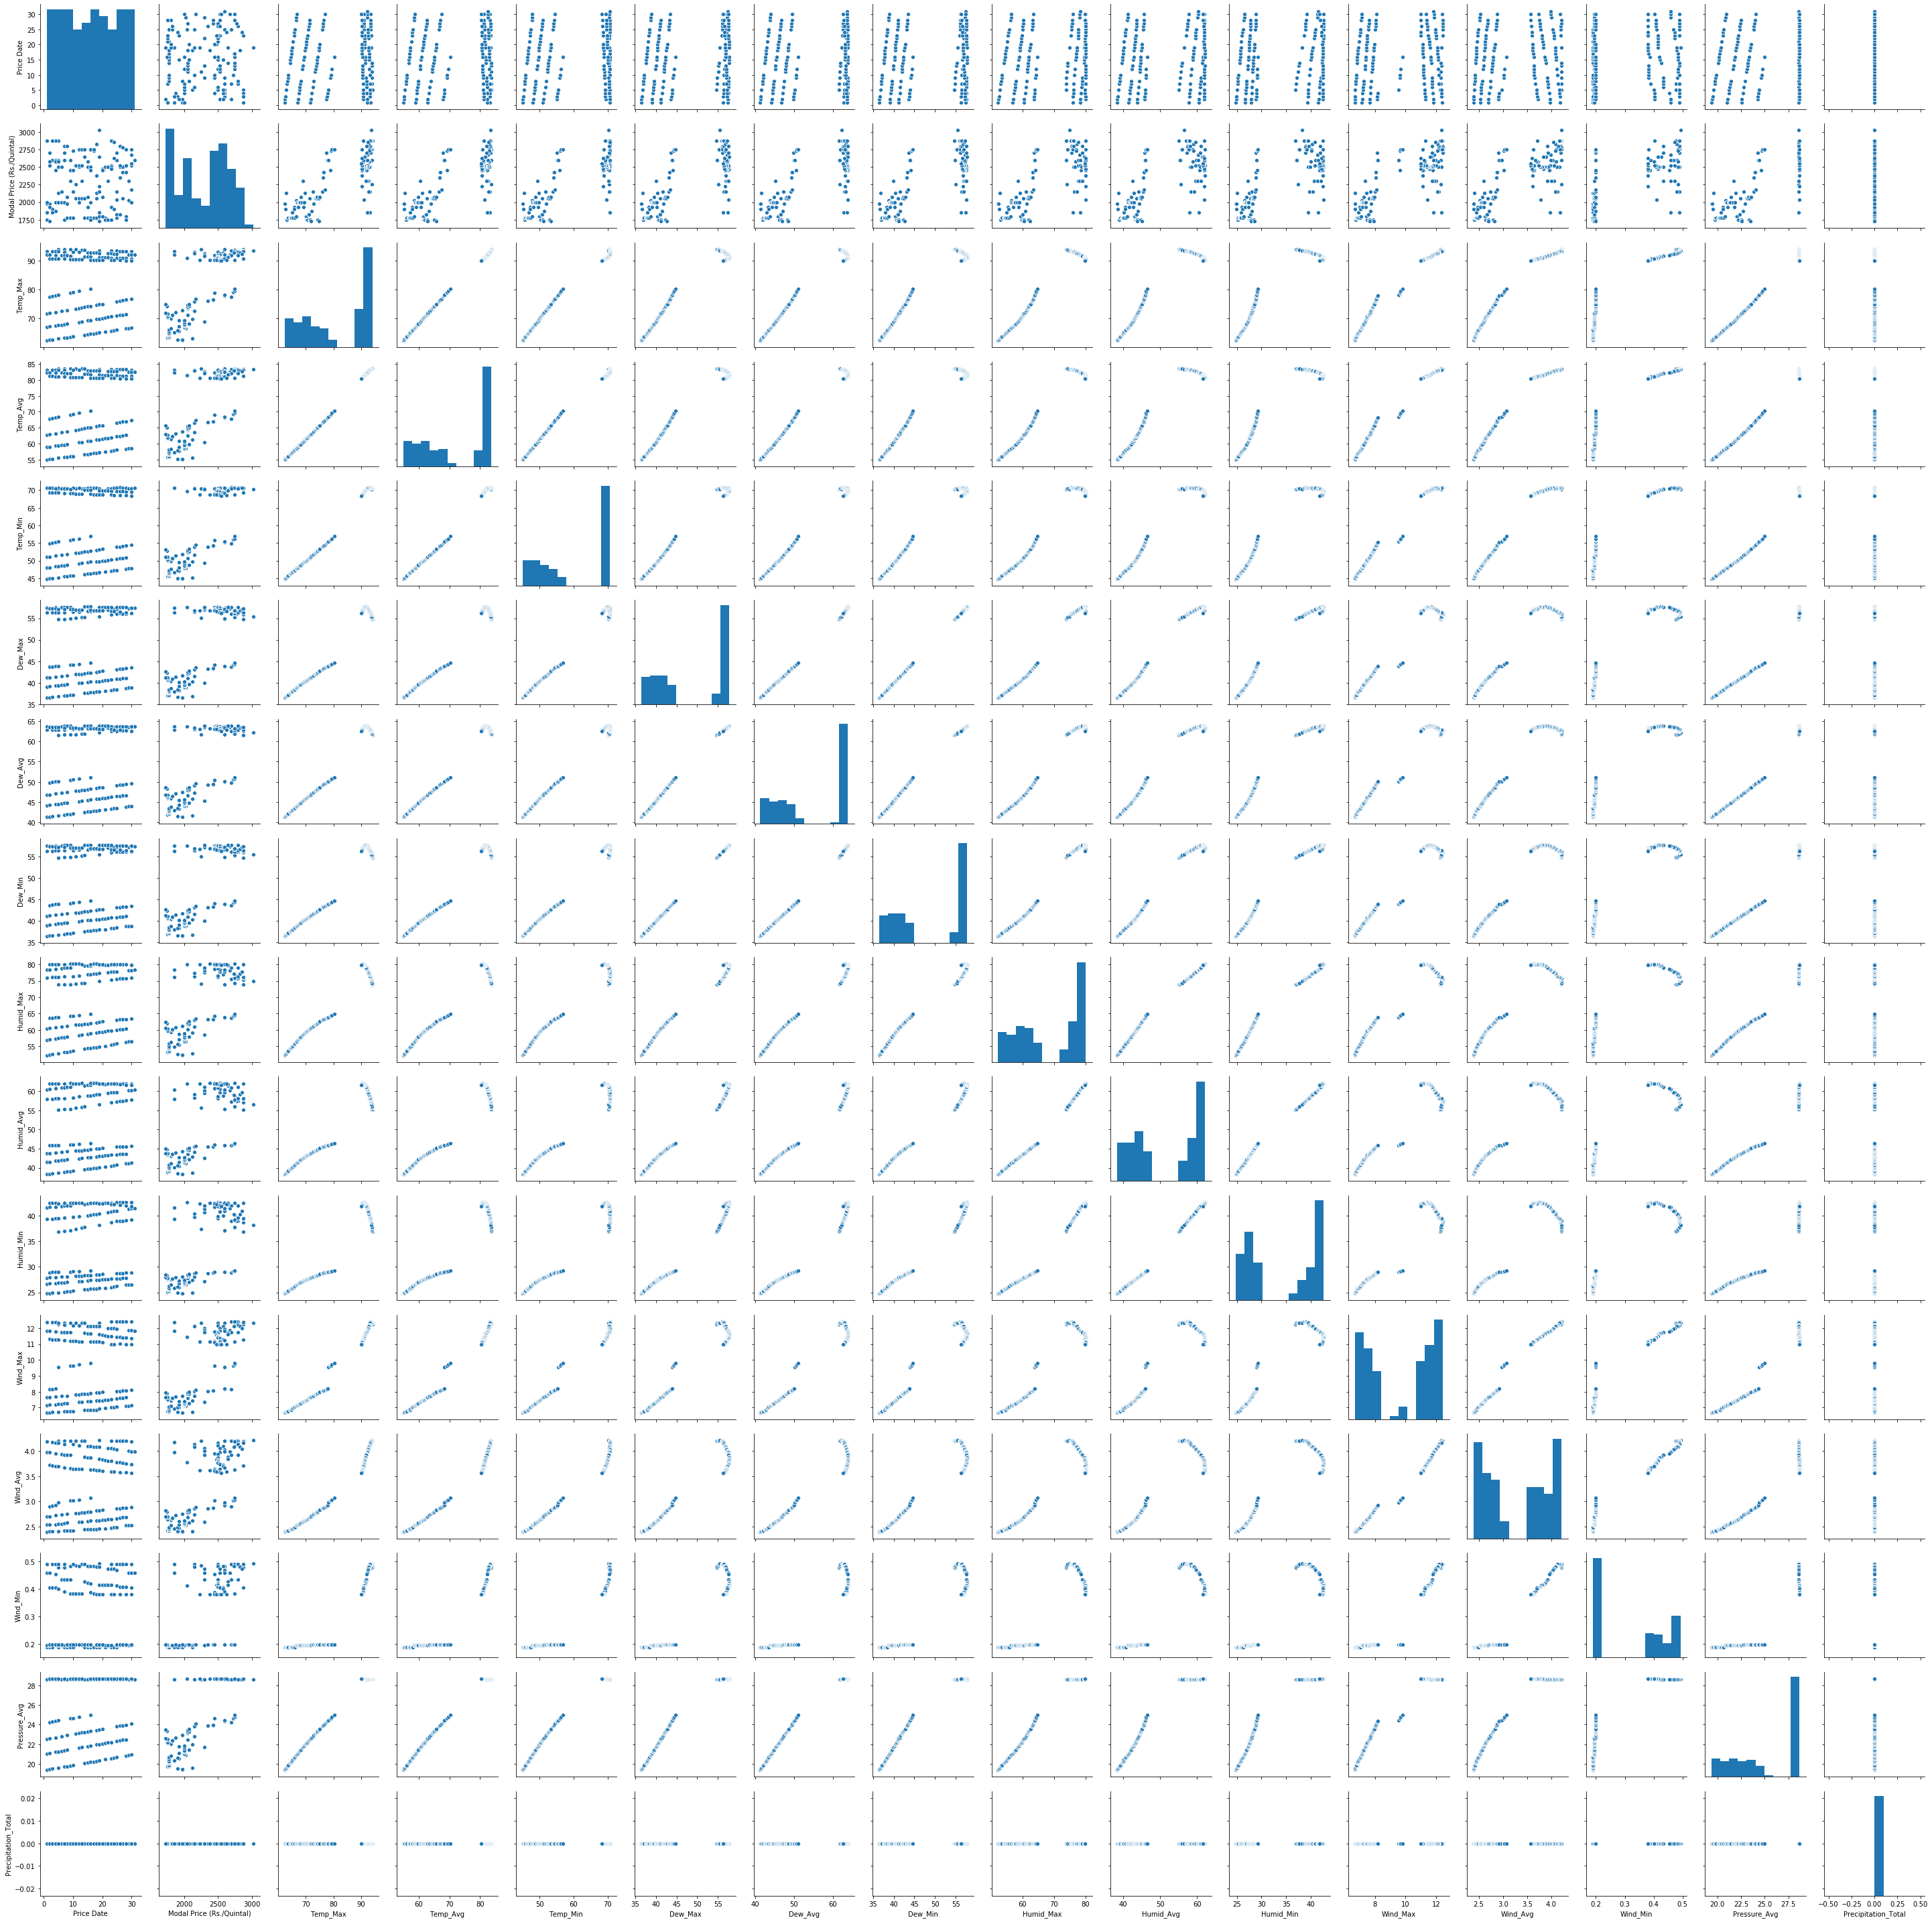

In [6]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [14]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 200,max_depth=300, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1.4640355110168457


In [15]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [16]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9478607336094438
0.705757476826832


# Feature Importance

In [17]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.10263923293730251
Temp_Max -> 0.06608777115193643
Temp_Avg -> 0.07162159923235435
Temp_Min -> 0.09631826801636013
Dew_Max -> 0.08030095608243794
Dew_Avg -> 0.06315224711506393
Dew_Min -> 0.06852929461658086
Humid_Max -> 0.05840188868171094
Humid_Avg -> 0.06788009877257471
Humid_Min -> 0.06487469392650284
Wind_Max -> 0.09171055567859356
Wind_Avg -> 0.07387605603677777
Wind_Min -> 0.025240652673463936
Pressure_Avg -> 0.06936668507834023
Precipitation_Total -> 0.0


# predicted vs Actual

In [18]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

2443.905->2650
2607.375->2750
1977.6275->2000
2468.465->2525
1808.6875->1750
1840.1875->1775
2745.775->2750
2565.665->2875
2632.685->2500
2451.745->2500
2497.56->2500
2375.75->2150
2584.25->2730
1917.9375->2025
2429.08->2750
2607.54->2800
1821.9375->1775
1997.1875->2075
2483.75->2450
2463.145->2500
1762.5625->1750
2448.875->2500
2448.5->2175
1893.8125->1750
2447.675->2450
1995.8125->2000
2548.31->2525
2546.465->2854
1845.3125->1900
1914.3125->1800
1790.5625->1775
2471.56->2650
2548.935->1850
2497.715->2300
1916.6925->2075
1930.9375->2150
2334.105->2875
2566.375->2475
2600.125->2450
1954.9375->1975
1827.8225->2075
2119.9375->2000


In [19]:
print(sum_a/l)

139.5402976190476


# Create picke file

In [20]:
import pickle
filename = 'Nagpur_Oranges'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [21]:
filename = 'Nagpur_Oranges'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [22]:
print(sum/len(actual))

79.69468085106382
